<a href="https://colab.research.google.com/github/LimLawrence/LearningCodes/blob/master/DecisionTreeClassUd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Import Dataset

In [2]:
#upload and enter filename - let dependent var be last col
#file in Udemy Classification folder
#dataset=pd.read_excel(path1,'Sales',parse_dates=True)
dataset = pd.read_csv('Social_Network_Ads.csv')

# hot encoder for categorical vars - new col for each value
dataset = pd.get_dummies(dataset, columns=['Gender'])

# reorder cols to put target var last: df2=df1[df1.columns[[3,2,1,0]]]
dataset=dataset[dataset.columns[[0,1,2,4,5,3]]]
dataset.head()


,User ID,Age,EstimatedSalary,Gender_Female,Gender_Male,Purchased
0,15624510,19,19000,0,1,0
1,15810944,35,20000,0,1,0
2,15668575,26,43000,1,0,0
3,15603246,27,57000,1,0,0
4,15804002,19,76000,0,1,0


In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


,User ID,Age,EstimatedSalary,Gender_Female,Gender_Male,Purchased
0,15624510,19,19000,0,1,0
1,15810944,35,20000,0,1,0
2,15668575,26,43000,1,0,0
3,15603246,27,57000,1,0,0
4,15804002,19,76000,0,1,0


Split Data - Training and Test Datasets

In [10]:
# 2 wasys to split - manually or taking values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

** Fit Classifier to Training Set

In [48]:
# Fitting Decision Tree Classification to the Training set
from sklearn import tree
#from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=5)
t = classifier.fit(X_train, y_train)
print(t)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


Confusion Matrix

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print(cm)

#score or accuracy_score 
# sc= t.score(dataset.iloc[:,:-1], dataset.iloc[:,-1])
accuracy_score(y_test, y_pred)

[[64  4]
 [ 6 26]]


0.9

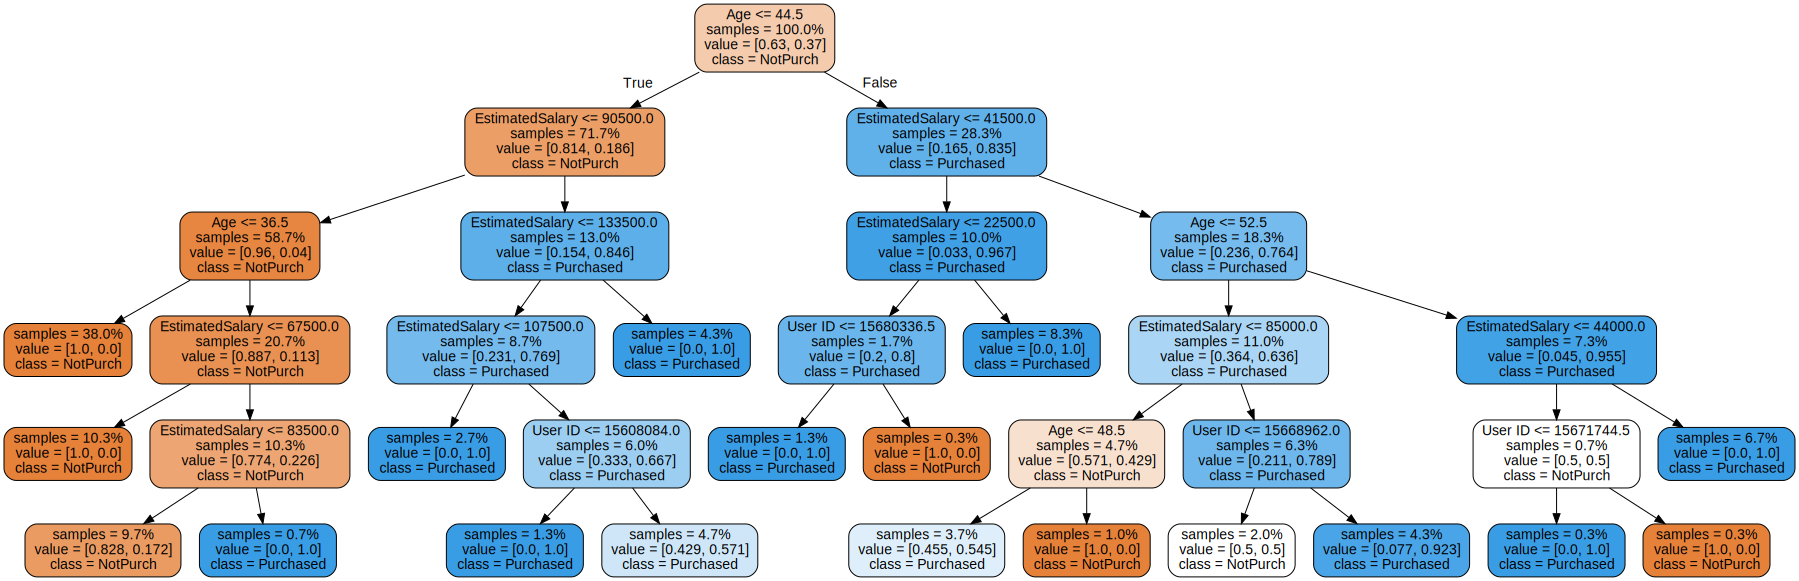

In [53]:
# visualize tree 

# need to get the X train col names but X_train are just the values
X_att = dataset.iloc[:, :-1]

import graphviz
dot_data = tree.export_graphviz(t, out_file=None, label="all", impurity=False, proportion=True,feature_names= list(X_att), class_names=["NotPurch", "Purchased"], filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

In [60]:
# we have score or accuracy
#cross validate the score - it splits 80-20 train and test
from sklearn.model_selection import cross_val_score

#inputs are tree, attribute df, target df
scores = cross_val_score(t, dataset.iloc[:,:-1], dataset.iloc[:,-1], cv=5)  #tree, whole dataset att, whole dataset target

# show average score and +/- two standard deviations away (covering 95% of scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



Accuracy: 0.83 (+/- 0.15)


In [61]:
# iterate over maxdepth to find the optimal max depth
for md in range(1, 20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=md)
    scores = cross_val_score(t, dataset.iloc[:,:-1], dataset.iloc[:,-1], cv=5)
    print("Max depth: %d, Accuracy: %0.2f (+/- %0.2f)" % (md, scores.mean(), scores.std() * 2))

# 2 or 3 is optimum depth for this dataset

Max depth: 1, Accuracy: 0.78 (+/- 0.18)
Max depth: 2, Accuracy: 0.89 (+/- 0.12)
Max depth: 3, Accuracy: 0.86 (+/- 0.12)
Max depth: 4, Accuracy: 0.83 (+/- 0.10)
Max depth: 5, Accuracy: 0.83 (+/- 0.16)
Max depth: 6, Accuracy: 0.81 (+/- 0.10)
Max depth: 7, Accuracy: 0.83 (+/- 0.08)
Max depth: 8, Accuracy: 0.82 (+/- 0.09)
Max depth: 9, Accuracy: 0.82 (+/- 0.09)
Max depth: 10, Accuracy: 0.81 (+/- 0.10)
Max depth: 11, Accuracy: 0.82 (+/- 0.10)
Max depth: 12, Accuracy: 0.81 (+/- 0.10)
Max depth: 13, Accuracy: 0.82 (+/- 0.11)
Max depth: 14, Accuracy: 0.82 (+/- 0.10)
Max depth: 15, Accuracy: 0.81 (+/- 0.11)
Max depth: 16, Accuracy: 0.82 (+/- 0.09)
Max depth: 17, Accuracy: 0.82 (+/- 0.11)
Max depth: 18, Accuracy: 0.82 (+/- 0.08)
Max depth: 19, Accuracy: 0.81 (+/- 0.11)
